In [1]:

from tensorflow import keras
from keras.layers import Conv2D,MaxPooling2D,UpSampling2D,Flatten,Dense
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

In [2]:
(x_train,_),(x_test,_)=mnist.load_data()

In [3]:
x_train = x_train.astype("float32")/255.0
x_test = x_test.astype("float")/255.0

In [4]:
noisy_factor=0.2
x_train_noisy=x_train + noisy_factor * np.random.normal(loc=0.0,scale=1.0,size=x_train.shape)
x_test_noisy= x_test +noisy_factor * np.random.normal(loc=0.0,scale=1.0,size=x_test.shape)

x_train_noisy=np.clip(x_train_noisy,0.0,1.0)
x_test_noisy=np.clip(x_test_noisy,0.0,1.0)


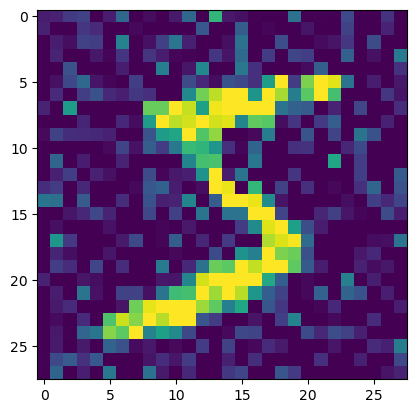

In [5]:
plt.imshow(x_train_noisy[0])

In [6]:
x_train_noisy = np.reshape(x_train_noisy,(len(x_train_noisy),28,28,1))
x_test_noisy = np.reshape(x_test_noisy,(len(x_test_noisy),28,28,1))

x_train = np.reshape(x_train,(len(x_train),28,28,1))
x_test = np.reshape(x_test,(len(x_test),28,28,1))

In [7]:
model=keras.models.Sequential()

#encoder
model.add(keras.layers.Input(shape=(28,28,1)))

model.add(Conv2D(16,(3,3),activation="relu",padding="same"))
model.add(MaxPooling2D(pool_size=(2,2),padding="same"))

model.add(Conv2D(8,(3,3),activation="relu",padding="same"))
model.add(MaxPooling2D(pool_size=(2,2),padding="same"))

#decoder
model.add(Conv2D(8,(3,3),activation="relu",padding="same"))
model.add(UpSampling2D((2,2)))

model.add(Conv2D(16,(3,3),activation="relu",padding="same"))
model.add(UpSampling2D((2,2)))

model.add(Conv2D(1,(3,3),activation="sigmoid",padding="same"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 8)           0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 8)           584       
                                                                 
 up_sampling2d (UpSampling2  (None, 14, 14, 8)         0

In [8]:
model.compile(loss='binary_crossentropy',optimizer="adam",metrics=['accuracy'])

In [9]:
model.fit(x_train_noisy,x_train,validation_data=(x_test_noisy,x_test), epochs=2,batch_size=128,verbose=1)

Epoch 1/2
469/469 [==============================] - 101s 207ms/step - loss: 0.1795 - accuracy: 0.8037 - val_loss: 0.0987 - val_accuracy: 0.8121
Epoch 2/2
469/469 [==============================] - 89s 189ms/step - loss: 0.0944 - accuracy: 0.8135 - val_loss: 0.0895 - val_accuracy: 0.8131


313/313 [==============================] - 5s 14ms/step


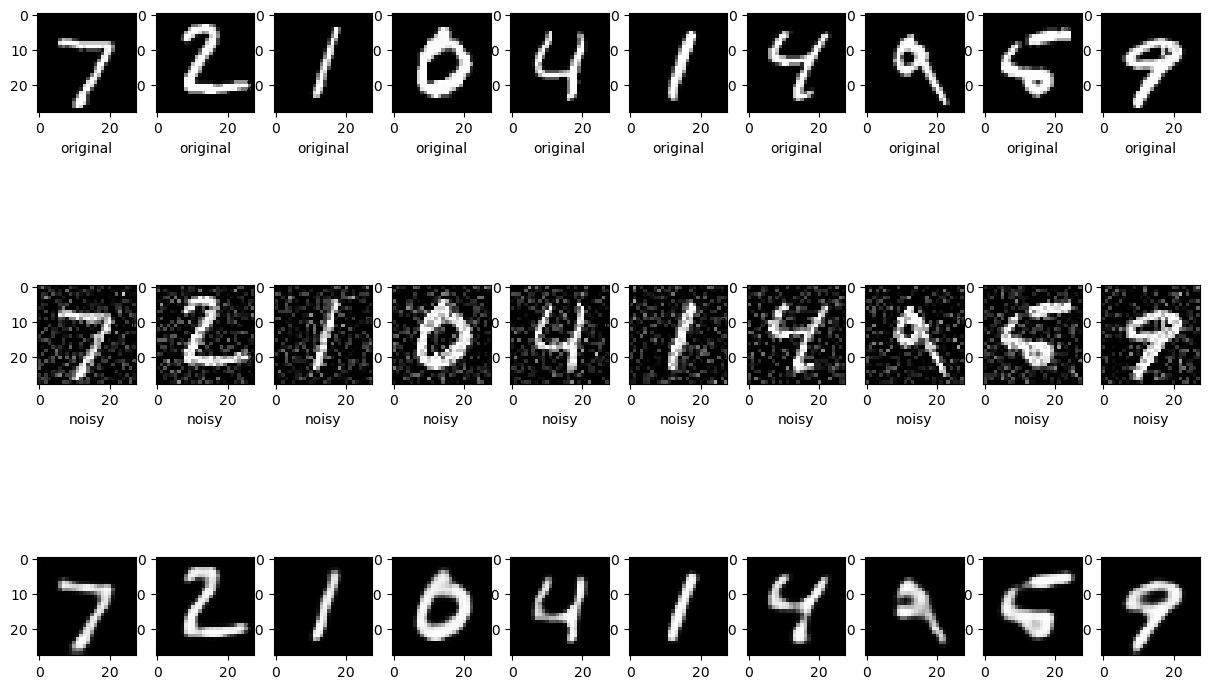

In [14]:
result=model.predict(x_test_noisy)
n=10
figure =plt.figure(figsize=(15,10))

for i in range(n):
    plt.subplot(3,n,i+1)
    plt.imshow(x_test[i].reshape(28,28),cmap="gray")
    plt.xlabel("original")
    
    plt.subplot(3,n,i+1+n)
    plt.imshow(x_test_noisy[i].reshape(28,28),cmap="gray")
    plt.xlabel("noisy")
    
    plt.subplot(3,n,i+1+2*n)
    plt.imshow(result[i].reshape(28,28),cmap="gray")
    plt.x_label=("denoised")